In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
matplotlib.rcParams.update({
    'figure.figsize': (10,10),
    'font.size': 18
})

%matplotlib widget

# Colour - number associations
0 - white

1 - yellow

2 - red

3 - orange

4 - blue

5 - green

In [2]:
white_face =  np.full((3, 3), 0)
yellow_face =  np.full((3, 3), 1)
red_face =  np.full((3, 3), 2)
orange_face =  np.full((3, 3), 3)
blue_face =  np.full((3, 3), 4)
green_face =  np.full((3, 3), 5)

# Cube face orientations
0 - F

1 - B

2 - U

3 - D

4 - R

5 - L

In [3]:
cube_state = np.array([green_face, blue_face, white_face, yellow_face, red_face, orange_face])
# print(cube_state)

# Now for turn definitions
We need to define U, D, R, L, F, B, M, E, and S

And probably their inverses as well :)

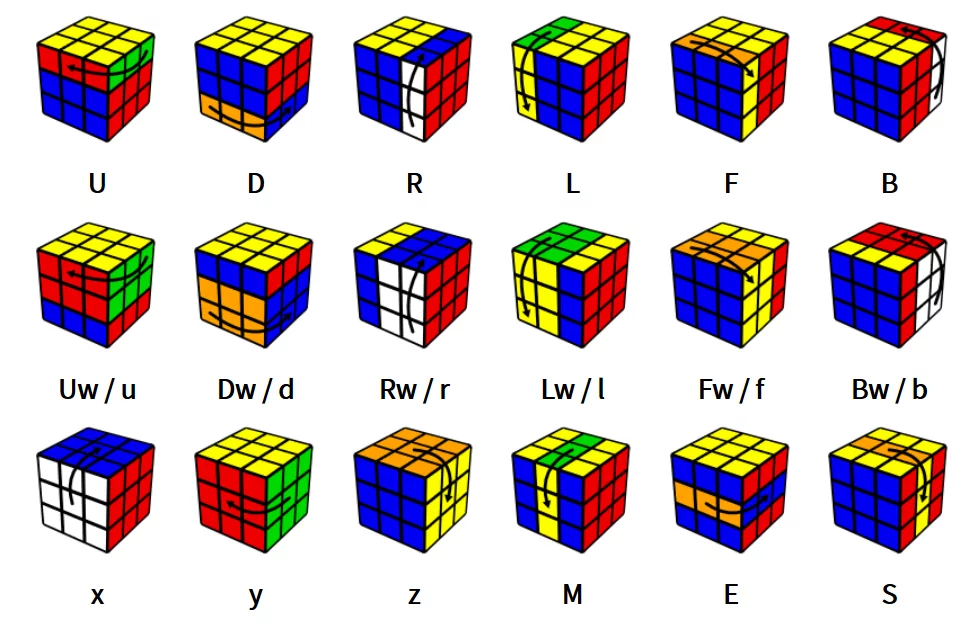

In [4]:
def rotate_clockwise(arr):
    return np.rot90(arr, k=3)

def rotate_anti_clockwise(arr):
    return np.rot90(arr)

In [5]:
def F(state):
    
    new_F = rotate_clockwise(state[0])

    temp_arr_1 = state[2][2]
    temp_arr_2 = state[4][...,0]
    temp_arr_3 = state[3][0]
    temp_arr_4 = state[5][...,2]
    
    new_state = np.copy(state)

    new_state[0] = new_F
    new_state[2][2] = temp_arr_4[::-1]
    new_state[4][...,0] = temp_arr_1
    new_state[3][0] = temp_arr_2[::-1]
    new_state[5][...,2] = temp_arr_3

    return new_state

def F_prime(state):

    new_F = rotate_anti_clockwise(state[0])

    temp_arr_1 = state[2][2]
    temp_arr_2 = state[4][...,0]
    temp_arr_3 = state[3][0]
    temp_arr_4 = state[5][...,2]
    
    new_state = np.copy(state)
    
    new_state[0] = new_F
    new_state[2][2] = temp_arr_2
    new_state[4][...,0] = temp_arr_3[::-1]
    new_state[3][0] = temp_arr_4
    new_state[5][...,2] = temp_arr_1[::-1]

    return new_state

In [6]:
def B(state):
    
    new_B = rotate_clockwise(state[1])

    temp_arr_1 = state[2][0]
    temp_arr_2 = state[5][...,0]
    temp_arr_3 = state[3][2]
    temp_arr_4 = state[4][...,2]
    
    new_state = np.copy(state)

    new_state[1] = new_B

    new_state[2][0] = temp_arr_4
    new_state[5][...,0] = temp_arr_1[::-1]
    new_state[3][2] = temp_arr_2
    new_state[4][...,2] = temp_arr_3[::-1]

    return new_state

def B_prime(state):

    new_B = rotate_anti_clockwise(state[1])

    temp_arr_1 = state[2][0]
    temp_arr_2 = state[5][...,0]
    temp_arr_3 = state[3][2]
    temp_arr_4 = state[4][...,2]
    
    new_state = np.copy(state)
    
    new_state[1] = new_B

    new_state[2][0] = temp_arr_2[::-1]
    new_state[5][...,0] = temp_arr_3
    new_state[3][2] = temp_arr_4[::-1]
    new_state[4][...,2] = temp_arr_1

    return new_state

In [7]:
def U(state):

    new_U = rotate_clockwise(state[2])

    temp_arr_1 = state[1][0]
    temp_arr_2 = state[4][0]
    temp_arr_3 = state[0][0]
    temp_arr_4 = state[5][0]

    new_state = np.copy(state)

    new_state[2] = new_U

    new_state[1][0] = temp_arr_4
    new_state[4][0] = temp_arr_1
    new_state[0][0] = temp_arr_2
    new_state[5][0] = temp_arr_3

    return new_state

def U_prime(state):

    new_U = rotate_anti_clockwise(state[2])

    temp_arr_1 = state[1][0]
    temp_arr_2 = state[4][0]
    temp_arr_3 = state[0][0]
    temp_arr_4 = state[5][0]
    
    new_state = np.copy(state)
    
    new_state[2] = new_U

    new_state[1][0] = temp_arr_2
    new_state[4][0] = temp_arr_3
    new_state[0][0] = temp_arr_4
    new_state[5][0] = temp_arr_1

    return new_state

In [8]:
def D(state):

    new_D = rotate_clockwise(state[3])

    temp_arr_1 = state[0][2]
    temp_arr_2 = state[4][2]
    temp_arr_3 = state[1][2]
    temp_arr_4 = state[5][2]

    new_state = np.copy(state)

    new_state[3] = new_D

    new_state[0][2] = temp_arr_4
    new_state[4][2] = temp_arr_1
    new_state[1][2] = temp_arr_2
    new_state[5][2] = temp_arr_3

    return new_state

def D_prime(state):

    new_D = rotate_anti_clockwise(state[3])

    temp_arr_1 = state[0][2]
    temp_arr_2 = state[4][2]
    temp_arr_3 = state[1][2]
    temp_arr_4 = state[5][2]
    
    new_state = np.copy(state)
    
    new_state[3] = new_D

    new_state[0][2] = temp_arr_2
    new_state[4][2] = temp_arr_3
    new_state[1][2] = temp_arr_4
    new_state[5][2] = temp_arr_1

    return new_state

In [9]:
def R(state):
    
    new_R = rotate_clockwise(state[4])

    temp_arr_1 = state[2][...,2]
    temp_arr_2 = state[1][...,0]
    temp_arr_3 = state[3][...,2]
    temp_arr_4 = state[0][...,2]

    new_state = np.copy(state)

    new_state[4] = new_R

    new_state[2][...,2] = temp_arr_4
    new_state[1][...,0] = temp_arr_1[::-1]
    new_state[3][...,2] = temp_arr_2[::-1]
    new_state[0][...,2] = temp_arr_3

    return new_state

def R_prime(state):
    
    new_R = rotate_anti_clockwise(state[4])

    temp_arr_1 = state[2][...,2]
    temp_arr_2 = state[1][...,0]
    temp_arr_3 = state[3][...,2]
    temp_arr_4 = state[0][...,2]

    new_state = np.copy(state)

    new_state[4] = new_R

    new_state[2][...,2] = temp_arr_2[::-1]
    new_state[1][...,0] = temp_arr_3[::-1]
    new_state[3][...,2] = temp_arr_4
    new_state[0][...,2] = temp_arr_1
    
    return new_state

In [10]:
def L(state):
    
    new_L = rotate_clockwise(state[5])

    temp_arr_1 = state[2][...,0]
    temp_arr_2 = state[0][...,0]
    temp_arr_3 = state[3][...,0]
    temp_arr_4 = state[1][...,2]

    new_state = np.copy(state)

    new_state[5] = new_L

    new_state[2][...,0] = temp_arr_4[::-1]
    new_state[0][...,0] = temp_arr_1
    new_state[3][...,0] = temp_arr_2
    new_state[1][...,2] = temp_arr_3[::-1]

    return new_state

def L_prime(state):
    
    new_L = rotate_anti_clockwise(state[5])

    temp_arr_1 = state[2][...,0]
    temp_arr_2 = state[0][...,0]
    temp_arr_3 = state[3][...,0]
    temp_arr_4 = state[1][...,2]

    new_state = np.copy(state)

    new_state[5] = new_L

    new_state[2][...,0] = temp_arr_2
    new_state[0][...,0] = temp_arr_3
    new_state[3][...,0] = temp_arr_4[::-1]
    new_state[1][...,2] = temp_arr_1[::-1]
    
    return new_state

In [11]:
def M(state):
    
    temp_arr_1 = state[0][...,1]
    temp_arr_2 = state[2][...,1]
    temp_arr_3 = state[1][...,1]
    temp_arr_4 = state[3][...,1]

    new_state = np.copy(state)

    new_state[0][...,1] = temp_arr_2
    new_state[2][...,1] = temp_arr_3[::-1]
    new_state[1][...,1] = temp_arr_4[::-1]
    new_state[3][...,1] = temp_arr_1

    return new_state

def M_prime(state):

    temp_arr_1 = state[0][...,1]
    temp_arr_2 = state[2][...,1]
    temp_arr_3 = state[1][...,1]
    temp_arr_4 = state[3][...,1]

    new_state = np.copy(state)

    new_state[0][...,1] = temp_arr_4
    new_state[2][...,1] = temp_arr_1
    new_state[1][...,1] = temp_arr_2[::-1]
    new_state[3][...,1] = temp_arr_3[::-1]

    return new_state


In [12]:
def E(state):
    
    temp_arr_1 = state[0][1]
    temp_arr_2 = state[4][1]
    temp_arr_3 = state[1][1]
    temp_arr_4 = state[5][1]

    new_state = np.copy(state)

    new_state[0][1] = temp_arr_4
    new_state[4][1] = temp_arr_1
    new_state[1][1] = temp_arr_2
    new_state[5][1] = temp_arr_3

    return new_state

def E_prime(state):

    temp_arr_1 = state[0][1]
    temp_arr_2 = state[4][1]
    temp_arr_3 = state[1][1]
    temp_arr_4 = state[5][1]

    new_state = np.copy(state)

    new_state[0][1] = temp_arr_2
    new_state[4][1] = temp_arr_3
    new_state[1][1] = temp_arr_4
    new_state[5][1] = temp_arr_1

    return new_state


In [13]:
def S(state):
    
    temp_arr_1 = state[2][1]
    temp_arr_2 = state[4][...,1]
    temp_arr_3 = state[3][1]
    temp_arr_4 = state[5][...,1]

    new_state = np.copy(state)

    new_state[2][1] = temp_arr_4[::-1]
    new_state[4][...,1] = temp_arr_1
    new_state[3][1] = temp_arr_2[::-1]
    new_state[5][...,1] = temp_arr_3

    return new_state

def S_prime(state):

    temp_arr_1 = state[2][1]
    temp_arr_2 = state[4][...,1]
    temp_arr_3 = state[3][1]
    temp_arr_4 = state[5][...,1]

    new_state = np.copy(state)

    new_state[2][1] = temp_arr_2
    new_state[4][...,1] = temp_arr_3[::-1]
    new_state[3][1] = temp_arr_4
    new_state[5][...,1] = temp_arr_1[::-1]

    return new_state


In [14]:
def visualise_face(face, translation, ax):

    ax.add_patch(plt.Rectangle((translation[0]-1, translation[1]+1), 0.8, 0.8, color=colours[face[0][0]]))
    ax.add_patch(plt.Rectangle((translation[0]+0, translation[1]+1), 0.8, 0.8, color=colours[face[0][1]]))
    ax.add_patch(plt.Rectangle((translation[0]+1, translation[1]+1), 0.8, 0.8, color=colours[face[0][2]]))

    ax.add_patch(plt.Rectangle((translation[0]-1, translation[1]+0), 0.8, 0.8, color=colours[face[1][0]]))
    ax.add_patch(plt.Rectangle((translation[0]+0, translation[1]+0), 0.8, 0.8, color=colours[face[1][1]]))
    ax.add_patch(plt.Rectangle((translation[0]+1, translation[1]+0), 0.8, 0.8, color=colours[face[1][2]]))

    ax.add_patch(plt.Rectangle((translation[0]-1, translation[1]-1), 0.8, 0.8, color=colours[face[2][0]]))
    ax.add_patch(plt.Rectangle((translation[0]+0, translation[1]-1), 0.8, 0.8, color=colours[face[2][1]]))
    ax.add_patch(plt.Rectangle((translation[0]+1, translation[1]-1), 0.8, 0.8, color=colours[face[2][2]]))


In [15]:
colours = ['white', 'yellow', 'red', 'orange', 'blue', 'green']

In [16]:
def visualise_state(state, ax):

    ax.add_patch(plt.Rectangle((-15, -15), 30, 30, color='gray'))

    # ax.add_patch(plt.Rectangle((0, 0), 0.8, 0.8, color=colours[state[0][0][0]]))
    visualise_face(state[0], [0, 0], ax)
    visualise_face(state[1], [8, 0], ax)
    visualise_face(state[2], [0, 4], ax)
    visualise_face(state[3], [0, -4], ax)
    visualise_face(state[4], [4, 0], ax)
    visualise_face(state[5], [-4, 0], ax)

    metric = calculate_metric(state)

    plt.xlim(-7.5, 12.5)
    plt.ylim(-10, 10)
    plt.title(f'$M_m$ = {metric:.5f}')
    plt.axis('off')
    plt.gca().set_aspect('equal')
    # plt.show()

In [17]:
def button_press(event, ax, state):

    global curr_cube_state
    global move_set

    if event.key == "f":
        new_state = F(state)
        move_set.append('F')

    elif event.key == "F":
        new_state = F_prime(state)
        move_set.append('F\'')

    elif event.key == "b":
        new_state = B(state)
        move_set.append('B')

    elif event.key == "B":
        new_state = B_prime(state)
        move_set.append('B\'')

    elif event.key == "u":
        new_state = U(state)
        move_set.append('U')
        
    elif event.key == "U":
        new_state = U_prime(state)
        move_set.append('U\'')

    elif event.key == "d":
        new_state = D(state)
        move_set.append('D')
        
    elif event.key == "D":
        new_state = D_prime(state)
        move_set.append('D\'')
    
    elif event.key == "r":
        new_state = R(state)
        move_set.append('R')
        
    elif event.key == "R":
        new_state = R_prime(state)
        move_set.append('R\'')

    elif event.key == "l":
        new_state = L(state)
        move_set.append('L')
        
    elif event.key == "L":
        new_state = L_prime(state)
        move_set.append('L\'')


    elif event.key == "m":
        new_state = M(state)
        move_set.append('M')


    elif event.key == "M":
        new_state = M_prime(state)
        move_set.append('M\'')

    elif event.key == "e":
        new_state = E(state)
        move_set.append('E')


    elif event.key == "E":
        new_state = E_prime(state)
        move_set.append('E\'')

    elif event.key == "h":
        new_state = S(state)
        move_set.append('S')


    elif event.key == "H":
        new_state = S_prime(state)
        move_set.append('S\'')
        
    else:
        new_state = state

    ax.cla()

    visualise_state(new_state, ax)

    curr_cube_state = new_state

    return

In [18]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[1,2],[0,0]]).T.tolist()
a[tuple(b)]

print(a.flatten())


[1 2 3 4 5 6 7 8 9]


In [19]:
def calculate_metric(state):
    # something about checking for all the entries in the state array, for all places one up/down OR one left/right, how many are the same colour as it. divide that by the number of pieces it's adjacent to. then average that over all pieces. that's your "metric" and all with the same metric are in a macrostate

    testers = [[1,3,4], [0,2,3,4,5], [1,4,5], [0,1,4,6,7], [0,1,2,3,5,6,7,8], [1,2,4,7,8], [3,4,7], [3,4,5,6,8], [4,5,7]]

    test_state = np.copy(state)

    total_sum = 0

    for face in test_state:
        face_flat = face.flatten()

        face_sum = 0
        for i in range(9):
            segment_colour = face_flat[i]

            unique, counts = np.unique(face_flat[testers[i]], return_counts=True)
            unique_dict = dict(zip(unique, counts))
            
            try:
                segment_count = unique_dict[segment_colour]
            except KeyError:
                segment_count = 0
            segment_frac = segment_count / len(testers[i])
            
            face_sum += segment_frac
        
        face_avg = face_sum / 9

        total_sum += face_avg

    total_avg = total_sum / 6

    return total_avg
    

In [20]:
def button_operation(start_state):

    global curr_cube_state
    curr_cube_state = np.copy(start_state)
    global move_set
    move_set = []

    fig = plt.figure()

    ax = fig.add_subplot()

    visualise_state(curr_cube_state, ax)


    cip = fig.canvas.mpl_connect('key_press_event', lambda event: button_press(event, ax, curr_cube_state))

In [21]:
def string_operation(start_state, input_str, vis=False):

    curr_state = np.copy(start_state)

    if vis == True:
        fig = plt.figure()

        ax = fig.add_subplot()

        visualise_state(curr_state, ax)

    input_split = input_str.split(' ')

    for i in input_split:
        # time.sleep(0.5)
        if i == "F":
            new_state = F(curr_state)

        elif i == "F'":
            new_state = F_prime(curr_state)

        elif i == "F2":
            new_state = F(F(curr_state))

        elif i == "B":
            new_state = B(curr_state)

        elif i == "B'":
            new_state = B_prime(curr_state)

        elif i == "B2":
            new_state = B(B(curr_state))

        elif i == "U":
            new_state = U(curr_state)
            
        elif i == "U'":
            new_state = U_prime(curr_state)

        elif i == "U2":
            new_state = U(U(curr_state))

        elif i == "D":
            new_state = D(curr_state)
            
        elif i == "D'":
            new_state = D_prime(curr_state)

        elif i == "D2":
            new_state = D(D(curr_state))

        elif i == "R":
            new_state = R(curr_state)
            
        elif i == "R'":
            new_state = R_prime(curr_state)

        elif i == "R2":
            new_state = R(R(curr_state))

        elif i == "L":
            new_state = L(curr_state)
            
        elif i == "L'":
            new_state = L_prime(curr_state)

        elif i == "L2":
            new_state = L(L(curr_state))

        curr_state = new_state

    if vis == True:
        visualise_state(curr_state, ax)
    
    return curr_state

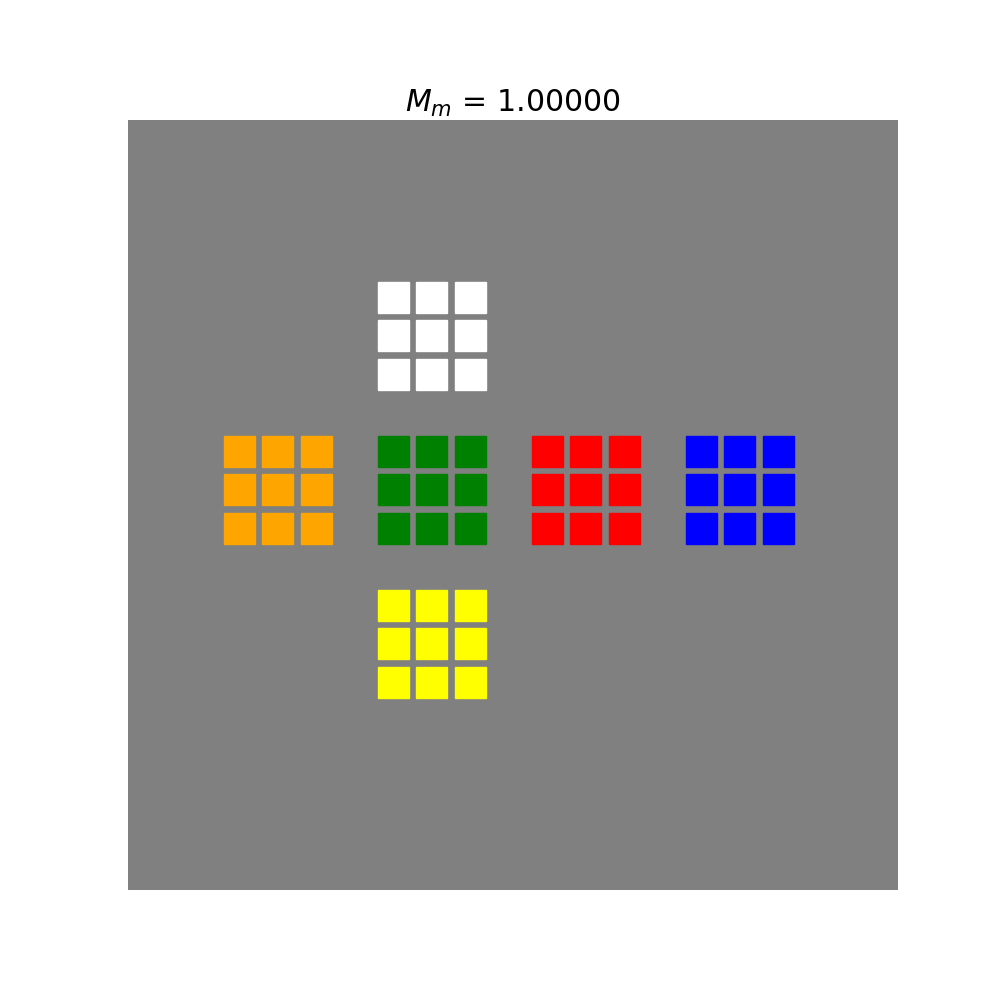

In [22]:
button_operation(cube_state)

In [ ]:
almost_done_state = np.copy(curr_cube_state)

1.0
0.23518518518518514


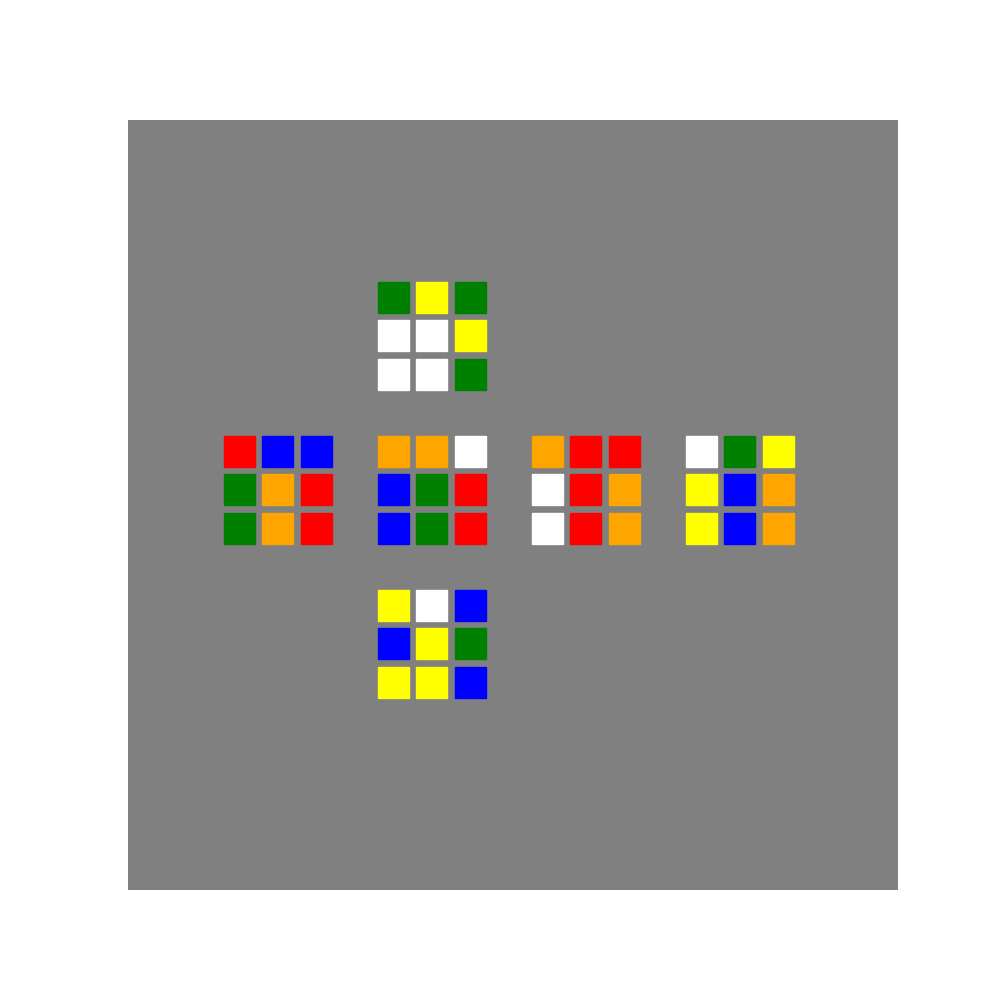

In [58]:

# button_operation(cube_state)

# test_str = 'F2 B2 U2 D2 R2 L2'
test_str = "F U F R L2 U' D B2 D' U' R L"

test_state = string_operation(cube_state, test_str, False)

print(calculate_metric(cube_state))
print(calculate_metric(test_state))

button_operation(test_state)

